In [1]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
main_path = r'C:\Users\Wojtek\Documents\Projects\MLPlayground\artykuliki\DataStandarization'
train_p = r'train.csv'
test_p = r'test.csv'
gender_submission = r'gender_submission.csv'

In [3]:
train_p = r'train.csv'
train = pd.read_csv(os.path.join(main_path, train_p))
test = pd.read_csv(os.path.join(main_path, test_p))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = ['Survived']

x = train[features]
y = train[target].values

In [6]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(x['Sex'].values))
x['Sex'] = le.transform(x['Sex'].values)

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [8]:
x['Age'].fillna(x['Age'].median(), inplace=True)

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [10]:
train, test = x.iloc[:500, :], x.iloc[500:, :]
y_train, y_test = np.ravel(y[:500]), np.ravel(y[500:])

In [11]:
svc_classifier = SVC()

In [12]:
svc_classifier.fit(train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
svc_classifier.score(test, y_test)

0.6828644501278772

In [14]:
standard_scaler = StandardScaler()
train_standarized = standard_scaler.fit_transform(train)
test_standarized = standard_scaler.transform(test)

In [20]:
standard_scaler.mean_

array([ 2.326    ,  0.63     , 28.959    ,  0.574    ,  0.38     ,
       31.7823324])

In [21]:
standard_scaler.scale_

array([ 0.82687605,  0.48280431, 13.01616359,  1.15261615,  0.77948701,
       47.55832569])

In [22]:
np.mean(train)

Pclass     2.326000
Sex        0.630000
Age       28.959000
SibSp      0.574000
Parch      0.380000
Fare      31.782332
dtype: float64

In [23]:
np.std(train)

Pclass     0.826876
Sex        0.482804
Age       13.016164
SibSp      1.152616
Parch      0.779487
Fare      47.558326
dtype: float64

In [16]:
svc_classifier.fit(train_standarized, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svc_classifier.score(test_standarized, y_test)

0.8286445012787724

In [18]:
logreg = LogisticRegression()

In [19]:
logreg.fit(train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logreg.score(test_standarized, y_test)

0.3836317135549872

In [21]:
logreg.fit(train_standarized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logreg.score(test_standarized, y_test)

0.7851662404092071

In [23]:
rf_classifier = RandomForestClassifier()

In [24]:
rf_classifier.fit(train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_classifier.score(test_standarized, y_test)

0.7519181585677749

In [26]:
rf_classifier.fit(train_standarized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_classifier.score(test_standarized, y_test)

0.7928388746803069

In [28]:
i = 5

ages = train.iloc[:, i]
ages_s = train_standarized[:, i]

In [29]:
import matplotlib.pyplot as plt

(array([322.,  90.,  35.,  23.,   6.,  13.,   1.,   0.,   2.,   2.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

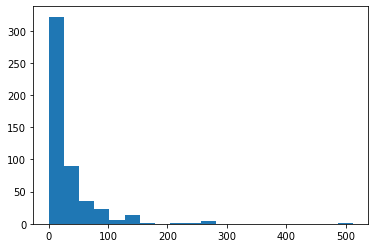

In [30]:
plt.hist(ages, bins=20)

(array([322.,  90.,  35.,  23.,   6.,  13.,   1.,   0.,   2.,   2.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.66828115, -0.12964864,  0.40898386,  0.94761636,  1.48624887,
         2.02488137,  2.56351387,  3.10214637,  3.64077888,  4.17941138,
         4.71804388,  5.25667639,  5.79530889,  6.33394139,  6.87257389,
         7.4112064 ,  7.9498389 ,  8.4884714 ,  9.02710391,  9.56573641,
        10.10436891]),
 <a list of 20 Patch objects>)

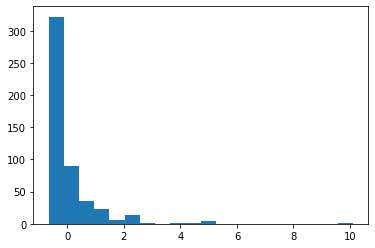

In [32]:
plt.hist(ages_s, bins=20)